In [1]:
if haskey(ENV, "COLAB_GPU")
    import Pkg
    Pkg.add("Distributions")
    Pkg.add("QuadGK")
end

using Distributions
using QuadGK
using Plots
default(fmt=:png, legend=false, size=(500, 300))

abspower(x, p) = x == 0 ? zero(x) : abs(x)^p 

absmoment(sample::AbstractArray, p, x) = sum(y -> abspower(y - x, p), sample)

function absmoment(dist::DiscreteUnivariateDistribution, p, x)
    μ, σ = mean(dist), std(dist)
    a, b = max(minimum(dist), round(Int, μ-6σ)), min(maximum(dist), roung(Int, μ+6σ))
    sum(y -> abspower(y - x, p) * pdf(dist, y), a:b)
end

function absmoment(dist::ContinuousUnivariateDistribution, p, x)
    a, b = extrema(dist)
    quadgk(y -> abspower(y - x, p) * pdf(dist, y), a, b)[1]
end

absmoment (generic function with 3 methods)

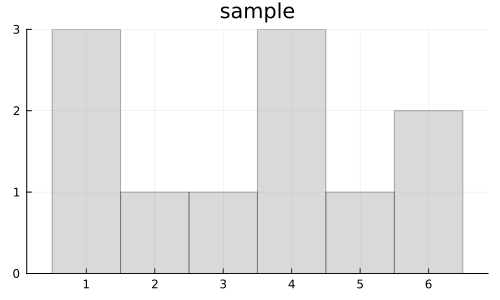

mean(sample) = 3.3636363636363638
median(sample) = 4.0
mode(sample) = 1


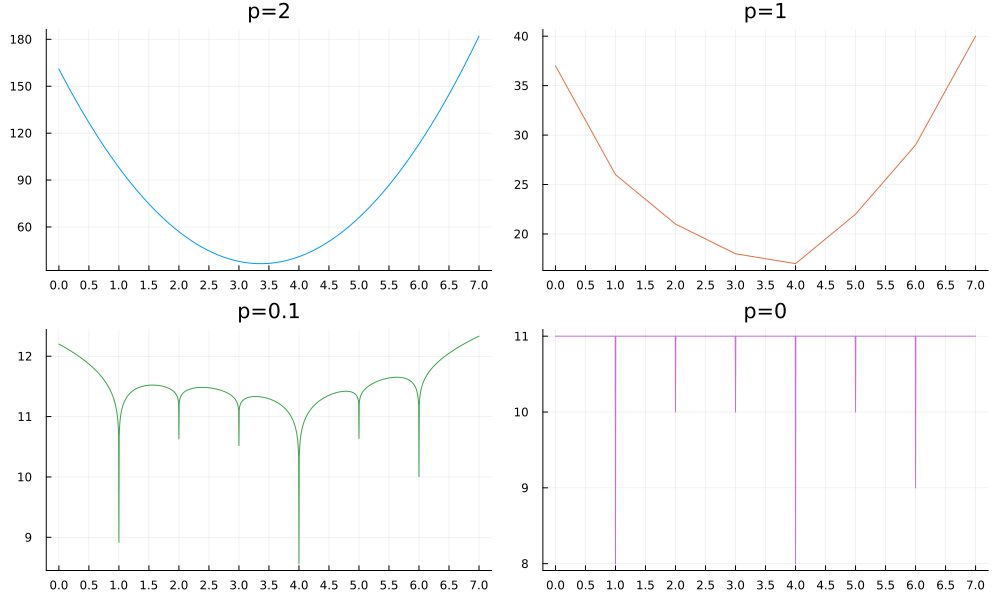

In [2]:
sample = [1, 1, 1, 2, 3, 4, 4, 4, 5, 6, 6]
histogram(sample; bin=0.5:6.5, title="sample", c=:gray, alpha=0.3) |> display
@show mean(sample) median(sample) mode(sample)

PP = []
for (i, p) in enumerate((2, 1, 0.1, 0))
    xs = range(0, 7, 1401)
    P = plot(xs, x -> absmoment(sample, p, x); title="p=$p", xtick=0:0.5:7, c=i)
    push!(PP, P)
end
plot(PP...; size=(1000, 600))

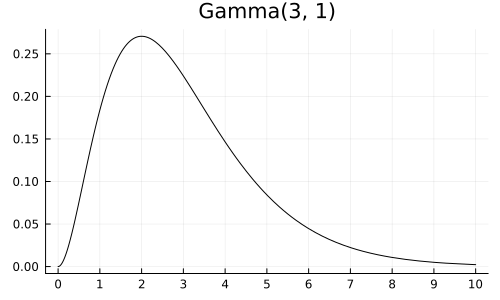

mean(dist) = 3.0
median(dist) = 2.67406031372356
mode(dist) = 2.0


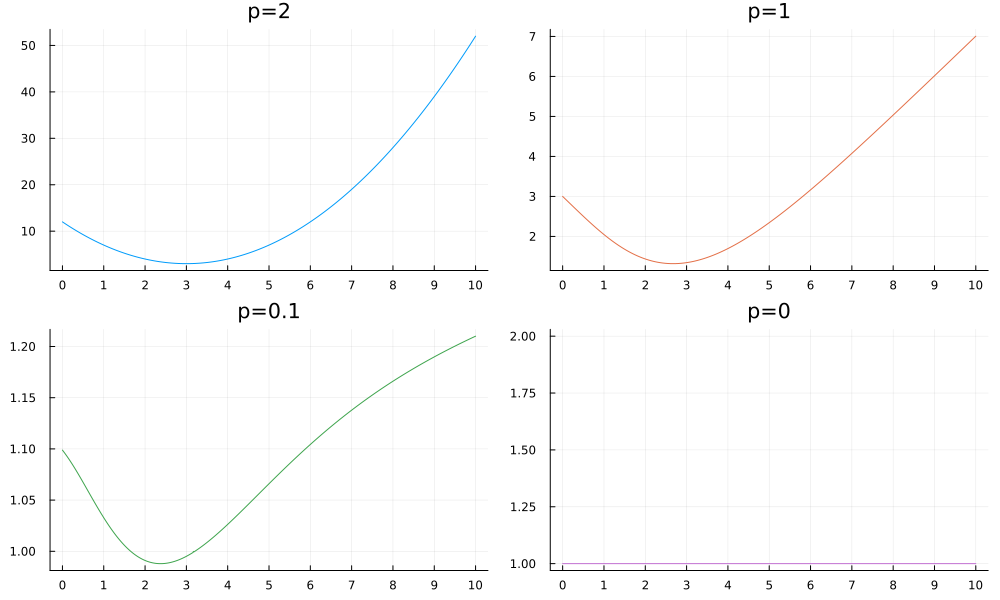

In [3]:
dist = Gamma(3, 1)
plot(x -> pdf(dist, x), 0, 10; title="Gamma(3, 1)", xtick=0:10, c=:black) |> display
@show mean(dist) median(dist) mode(dist)

PP = []
for (i, p) in enumerate((2, 1, 0.1, 0))
    xs = range(0, 10, 1001)
    P = plot(xs, x -> absmoment(dist, p, x); title="p=$p", xtick=0:10, c=i)
    push!(PP, P)
end
plot(PP...; size=(1000, 600))